In [1]:
import numpy as np
import scipy
from typing import Callable, Tuple, List
import matplotlib.pyplot as plt
from random import random

In [2]:
def generate_noise():
    k = np.arange(0, 1000, 1)
    X_k = [3 * i / 1000 for i in k]
    y_k = []
    f_x = [1 / (x**2 - 3 * x + 2) for x in X_k]
    for i in f_x:
        if i < -100:
            y_k.append(-100 + random())
        elif i >= -100 and i <= 100:
            y_k.append(i + random())
        else:
            y_k.append(100 + random())
    return X_k, y_k, f_x

In [3]:
x_k, y_k, f_x = generate_noise()

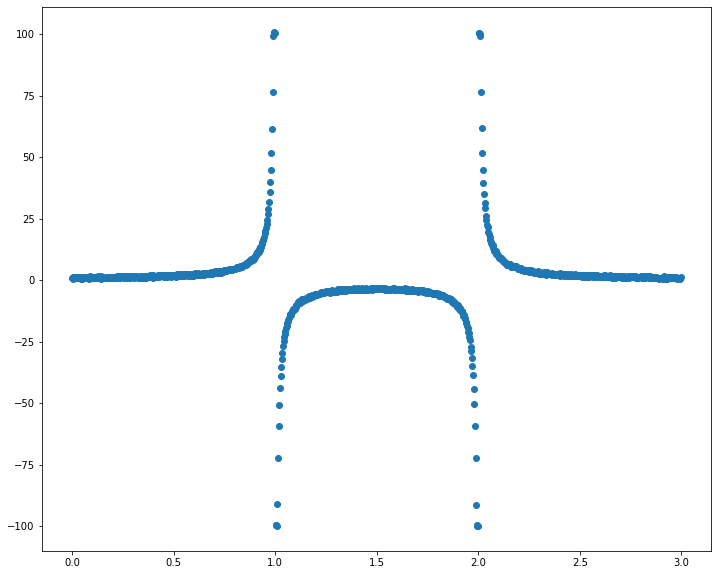

In [4]:
plt.figure(figsize=(12, 10))
plt.scatter(x_k, y_k)

In [5]:
def approximant(x, a, b, c, d):
    return (a * x + b) / (x**2 + c * x + d)

In [6]:
def least_squares(variables: Tuple[float], approximant, x: List[float], y: List[float]) -> float:
    return sum([(approximant(x_k, *variables) - y_k) ** 2 for x_k, y_k in zip(x, y)])

In [7]:
from scipy import optimize

#### Nelder-Mead

In [8]:
res_NM = optimize.minimize(least_squares,(1,1,1,1), args=(approximant, x_k, y_k), method='Nelder-Mead')

In [9]:
res_NM

 final_simplex: (array([[-1.00135387,  1.00184917, -2.00088612,  1.00090223],
       [-1.00134309,  1.00183807, -2.00088555,  1.00090165],
       [-1.00137022,  1.00186535, -2.00088556,  1.00090167],
       [-1.00136647,  1.00186156, -2.00088597,  1.00090207],
       [-1.00132068,  1.00181591, -2.00088607,  1.00090218]]), array([135417.86371478, 135417.86373101, 135417.86375057, 135417.86376734,
       135417.86380807]))
           fun: 135417.86371477685
       message: 'Optimization terminated successfully.'
          nfev: 508
           nit: 299
        status: 0
       success: True
             x: array([-1.00135387,  1.00184917, -2.00088612,  1.00090223])

In [10]:
yyy = [approximant(i, *res_NM.x) for i in np.arange(0, 3, 0.01)]

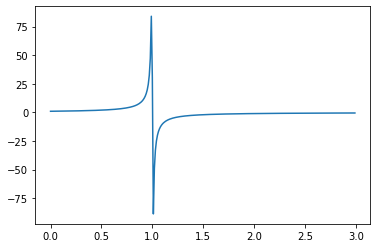

In [11]:
plt.plot(np.arange(0, 3, 0.01), yyy)

#### Levenberg–Marquardt 

In [12]:
def least(variables: Tuple[float], approximant, x: List[float], y: List[float]) -> float:
    return sum([(approximant(x_k, *variables) - y_k) for x_k, y_k in zip(x, y)])

In [13]:
def f_l(abcd):
    global x_k
    global y_k
    x_k = np.array(x_k)
    y_k = np.array(y_k)
    a,b,c,d = abcd
    return ((a*x_k + b) / (pow(x_k, 2) + c * x_k + d)) - y_k

In [14]:
res_lm =  scipy.optimize.least_squares(f_l, (1, 1, 1, 1), method='lm')

In [15]:
res_lm

 active_mask: array([0, 0, 0, 0])
        cost: 67711.9670045874
         fun: array([ 2.16340915e-01, -2.92313971e-01,  4.16227693e-01, -2.87709369e-01,
        7.91670631e-02, -3.56301288e-02, -1.39824482e-01, -2.61818534e-01,
       -4.49642740e-01,  1.59651856e-01, -1.53688099e-01,  2.85044681e-01,
        1.69821095e-01, -9.49514501e-02,  3.60389943e-01,  4.18896092e-01,
       -1.24416987e-01,  4.95414419e-01, -2.36769291e-01, -8.37728450e-03,
        3.23251463e-01, -2.17268628e-01,  1.99107255e-01,  3.10269753e-01,
       -5.78466315e-02,  1.47051642e-01, -2.35086251e-02,  2.87849986e-01,
        4.49771063e-01, -3.94652085e-01,  9.75100556e-02, -3.14912469e-01,
        4.20797974e-01,  3.77896736e-01, -3.76214469e-02, -6.35232546e-02,
        3.56744885e-01,  1.25495704e-01, -1.48403911e-01,  3.74774353e-01,
        3.72002814e-01, -2.72420804e-01, -4.54632067e-01,  2.05279640e-01,
       -3.01437073e-01,  3.25552898e-01,  2.28284566e-01, -3.47092318e-01,
        5.12629662e-0

#### Annealing

In [16]:
res_annealing = optimize.dual_annealing(least_squares, args=(approximant, x_k, y_k),bounds=list(zip([-3]*4, [3]*4)))

In [17]:
res_annealing

     fun: 135417.86700897102
 message: ['Maximum number of iteration reached']
    nfev: 8986
    nhev: 0
     nit: 1000
    njev: 197
  status: 0
 success: True
       x: array([-1.00119281,  1.00168795, -2.00088612,  1.00090221])

#### Differential Evolution

In [18]:
res_de = optimize.differential_evolution(least_squares, args=(approximant, x_k, y_k),bounds=list(zip([-3]*4, [3]*4)))

In [19]:
res_de

     fun: 135417.86702143226
     jac: array([  103.32150913,   104.15678907, -7307.65464035, -7245.06976295])
 message: 'Optimization terminated successfully.'
    nfev: 1250
     nit: 7
 success: True
       x: array([-1.00119207,  1.00168716, -2.00088602,  1.00090212])

In [20]:
res_NM.x[0]

-1.0013538748428916

In [21]:
len(x_k)

1000

In [22]:
tuple(res_NM.x)

(-1.0013538748428916,
 1.0018491663817704,
 -2.000886122587234,
 1.0009022283312097)

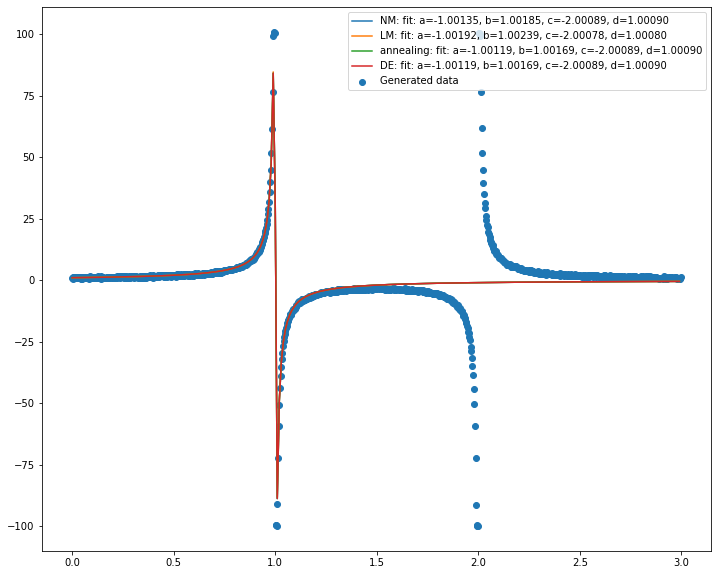

In [23]:
plt.figure(figsize=(12,10))
plt.scatter(x_k, y_k, label='Generated data') 
plt.plot(np.arange(0, 3, 0.01), [approximant(i, *res_NM.x) for i in np.arange(0, 3, 0.01)],
                 '-', label='NM: fit: a=%5.5f, b=%5.5f, c=%5.5f, d=%5.5f' % tuple(res_NM.x))
plt.plot(np.arange(0, 3, 0.01), [approximant(i, *res_lm.x) for i in np.arange(0, 3, 0.01)],
                 '-', label='LM: fit: a=%5.5f, b=%5.5f, c=%5.5f, d=%5.5f' % tuple(res_lm.x))
plt.plot(np.arange(0, 3, 0.01), [approximant(i, *res_annealing.x) for i in np.arange(0, 3, 0.01)],
         '-', label='annealing: fit: a=%5.5f, b=%5.5f, c=%5.5f, d=%5.5f' % tuple(res_annealing.x))
plt.plot(np.arange(0, 3, 0.01), [approximant(i, *res_de.x) for i in np.arange(0, 3, 0.01)],
                 '-', label='DE: fit: a=%5.5f, b=%5.5f, c=%5.5f, d=%5.5f' % tuple(res_de.x))
plt.legend()
plt.show()

### Travelling Salesman Problem

In [24]:
import re

In [25]:
XY = []
with open('tsp_coor.txt', 'r') as coor_info:
    for city in coor_info.readlines()[2:]:
        XY.append(tuple(map(float, re.split('\s+', city.strip()))))


In [26]:
XY

[(-57.0, 28.0),
 (54.0, -65.0),
 (46.0, 79.0),
 (8.0, 111.0),
 (-36.0, 52.0),
 (-22.0, -76.0),
 (34.0, 129.0),
 (74.0, 6.0),
 (-6.0, -41.0),
 (21.0, 45.0),
 (37.0, 155.0),
 (-38.0, 35.0),
 (-5.0, -24.0),
 (70.0, -74.0),
 (59.0, -26.0),
 (114.0, -56.0),
 (83.0, -41.0),
 (-40.0, -28.0),
 (21.0, -12.0),
 (0.0, 71.0),
 (50.0, 140.0),
 (-20.0, 70.0)]

In [27]:
distance = []
with open('tsp_dist.txt', 'r') as dist_info:
    for dist in dist_info.readlines()[7:]:
        distance.append(tuple(map(float, re.split('\s+', dist.strip()))))

In [28]:
print(*distance, sep='\n')

(0.0, 144.0, 114.0, 105.0, 31.0, 109.0, 135.0, 132.0, 85.0, 79.0, 158.0, 20.0, 73.0, 162.0, 127.0, 190.0, 156.0, 58.0, 87.0, 71.0, 154.0, 55.0)
(144.0, 0.0, 144.0, 181.0, 147.0, 76.0, 195.0, 73.0, 64.0, 114.0, 220.0, 135.0, 71.0, 18.0, 39.0, 60.0, 37.0, 101.0, 62.0, 146.0, 205.0, 153.0)
(114.0, 144.0, 0.0, 49.0, 86.0, 169.0, 51.0, 78.0, 130.0, 42.0, 76.0, 94.0, 114.0, 154.0, 105.0, 151.0, 125.0, 137.0, 94.0, 46.0, 61.0, 66.0)
(105.0, 181.0, 49.0, 0.0, 73.0, 189.0, 31.0, 124.0, 152.0, 67.0, 52.0, 88.0, 135.0, 195.0, 146.0, 197.0, 169.0, 147.0, 123.0, 40.0, 51.0, 49.0)
(31.0, 147.0, 86.0, 73.0, 0.0, 128.0, 104.0, 119.0, 97.0, 57.0, 126.0, 17.0, 82.0, 164.0, 122.0, 184.0, 151.0, 80.0, 85.0, 40.0, 123.0, 24.0)
(109.0, 76.0, 169.0, 189.0, 128.0, 0.0, 212.0, 126.0, 38.0, 128.0, 238.0, 112.0, 54.0, 92.0, 95.0, 137.0, 110.0, 51.0, 77.0, 148.0, 227.0, 146.0)
(135.0, 195.0, 51.0, 31.0, 104.0, 212.0, 0.0, 129.0, 174.0, 85.0, 26.0, 118.0, 157.0, 206.0, 157.0, 201.0, 176.0, 173.0, 141.0, 67.0, 19.0

In [29]:
# https://github.com/chncyhn/simulated-annealing-tsp

def plotTSP(paths, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    """

    # Unpack the primary TSP path and transform it into a list of ordered
    # coordinates

    x, y = [], []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])

    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi, yi = [], []
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]),
                    head_width = a_scale, color = 'r',
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(min(x)*1.1, max(x)*1.1)
    plt.ylim(min(y)*1.1, max(y)*1.1)
    plt.show()


In [47]:
import math
import random


class SimAnneal(object):
    def __init__(self, coords, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1):
        self.coords = coords
        self.N = len(coords)
        self.T = math.sqrt(self.N) if T == -1 else T
        self.T_save = self.T  # save inital T to reset if batch annealing is used
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-8 if stopping_T == -1 else stopping_T
        self.stopping_iter = 100000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1

        self.nodes = [i for i in range(self.N)]

        self.best_solution = None
        self.best_fitness = float("Inf")
        self.fitness_list = []

    def initial_solution(self):
        """
        Greedy algorithm to get an initial solution (closest-neighbour).
        """
        cur_node = random.choice(self.nodes)  # start from a random node
        solution = [cur_node]

        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = random.choice(list(free_nodes))  
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node

        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:  # If best found so far, update best fitness
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit
        
    def dist(self, node_0, node_1):
        """
        Euclidean distance between two nodes.
        """
        coord_0, coord_1 = self.coords[node_0], self.coords[node_1]
        return math.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)

    def fitness(self, solution):
        """
        Total distance of the current solution path.
        """
        cur_fit = 0
        for i in range(self.N):
            cur_fit += self.dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit

    def p_accept(self, candidate_fitness):
        """
        Probability of accepting if the candidate is worse than current.
        Depends on the current temperature and difference between candidate and current.
        """
        return math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)

    def accept(self, candidate):
        """
        Accept with probability 1 if candidate is better than current.
        Accept with probabilty p_accept(..) if candidate is worse.
        """
        candidate_fitness = self.fitness(candidate)
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate

    def anneal(self):
        """
        Execute simulated annealing algorithm.
        """
        # Initialize with the greedy solution.
        self.cur_solution, self.cur_fitness = self.initial_solution()

        print("Starting annealing.")
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.accept(candidate)
            self.T *= self.alpha
            self.iteration += 1

            self.fitness_list.append(self.cur_fitness)

        print("Best fitness obtained: ", self.best_fitness)


    def visualize_routes(self):
        """
        Visualize the TSP route with matplotlib.
        """
        plotTSP([self.best_solution], self.coords)


Starting annealing.
Best fitness obtained:  2291.953287336668


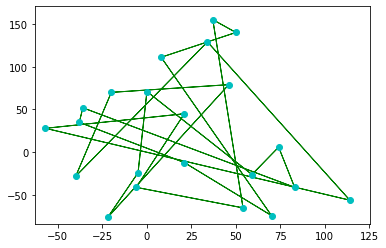

In [48]:
sa = SimAnneal(XY, stopping_iter=0)
sa.anneal()
sa.visualize_routes()

Starting annealing.
Best fitness obtained:  821.0666865322274


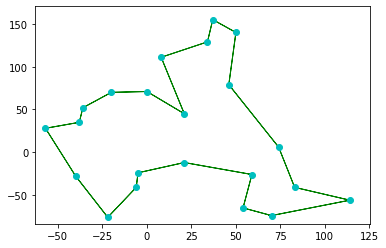

In [49]:
sa = SimAnneal(XY, stopping_iter=5000)
sa.anneal()
sa.visualize_routes()